In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Definir transformaciones para las imágenes
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensiona las imágenes a 224x224 píxeles
    transforms.ToTensor(),  # Convierte las imágenes a tensores
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización
])

# Cargar los datos de entrenamiento y validación
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/sis421/dataset/train', transform=data_transforms)
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/sis421/dataset/val', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [4]:
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar la imagen
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


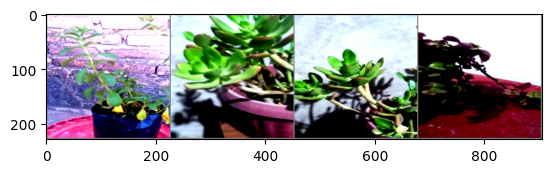

stevia planta_jade planta_jade dolar


In [5]:
# Obtener un lote de imágenes del DataLoader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar las primeras 4 imágenes del lote
imshow(torchvision.utils.make_grid(images[:4]))

# Mostrar las etiquetas correspondientes
print(' '.join(f'{train_dataset.classes[labels[j]]:5s}' for j in range(4)))


In [6]:
# Creamos la CNN
import torch.nn as nn
import torch.nn.functional as F

class PlantCNN(nn.Module):
    def __init__(self, num_classes):
        super(PlantCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Especificar el número de clases basado en el dataset
num_classes = len(train_dataset.classes)
model = PlantCNN(num_classes)


In [7]:
model_path = '/content/drive/MyDrive/sis421/models/plant_cnn.pth'
model.load_state_dict(torch.load(model_path))

<ipython-input-7-35abc4be4d25>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:
# ENTRENAMIENTO DEL MODELO
# bucle de entrenamiento para ajustar los parametros
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
start_epoch = 11
num_epochs = 20


for epoch in range(start_epoch, start_epoch+num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Validación
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy:.2f}%')


Epoch 12/20, Loss: 0.0246
Validation Accuracy: 96.87%
Epoch 13/20, Loss: 0.0688
Validation Accuracy: 94.20%
Epoch 14/20, Loss: 0.0231
Validation Accuracy: 96.13%
Epoch 15/20, Loss: 0.0066
Validation Accuracy: 96.47%
Epoch 16/20, Loss: 0.0014
Validation Accuracy: 97.07%
Epoch 17/20, Loss: 0.0021
Validation Accuracy: 95.93%
Epoch 18/20, Loss: 0.0303
Validation Accuracy: 82.93%
Epoch 19/20, Loss: 0.0787
Validation Accuracy: 95.27%
Epoch 20/20, Loss: 0.0135
Validation Accuracy: 96.33%
Epoch 21/20, Loss: 0.0009
Validation Accuracy: 96.60%
Epoch 22/20, Loss: 0.0003
Validation Accuracy: 96.93%
Epoch 23/20, Loss: 0.0001
Validation Accuracy: 97.07%
Epoch 24/20, Loss: 0.0008
Validation Accuracy: 95.73%
Epoch 25/20, Loss: 0.0050
Validation Accuracy: 94.60%
Epoch 26/20, Loss: 0.0426
Validation Accuracy: 93.07%
Epoch 27/20, Loss: 0.0505
Validation Accuracy: 96.13%
Epoch 28/20, Loss: 0.0185
Validation Accuracy: 96.40%
Epoch 29/20, Loss: 0.0088
Validation Accuracy: 95.47%
Epoch 30/20, Loss: 0.0106
Va

In [10]:
#guardar el modelo
model_path = '/content/drive/MyDrive/sis421/models/plant_cnn2.pth'
torch.save(model.state_dict(), model_path)


In [11]:
optimizer_path = '/content/drive/MyDrive/sis421/optimizers/plantOptimizer.pth'
torch.save(optimizer.state_dict(), optimizer_path)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
